In [17]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import files
uploads = files.upload()
customers_csv = pd.read_csv('Customers.csv')
transactions_csv = pd.read_csv('Transactions.csv')


Saving Customers.csv to Customers.csv
Saving Data Science Intern _ Assignment (1).pdf to Data Science Intern _ Assignment (1).pdf
Saving Harshavardhan_M_EDA.ipynb to Harshavardhan_M_EDA.ipynb
Saving Harshavardhan_M_EDA.pdf to Harshavardhan_M_EDA.pdf
Saving Harshavardhan_M_Lookalike.csv to Harshavardhan_M_Lookalike.csv
Saving Harshavardhan_M_Lookalike.ipynb to Harshavardhan_M_Lookalike.ipynb
Saving Products.csv to Products.csv
Saving Transactions.csv to Transactions.csv


In [3]:
#merged_data_trans_cust = pd.merge(transactions_csv, customers_csv, on='CustomerID')

In [6]:
transactions_csv['TransactionDate'] = pd.to_datetime(transactions_csv['TransactionDate'])
recent_transactions = transactions_csv.groupby('CustomerID')['TransactionDate'].max().reset_index()
date = pd.to_datetime('2025-01-01')
recent_transactions['RecentTransactionDays'] = (date - recent_transactions['TransactionDate']).dt.days

In [13]:
customers_csv['history'] = (date - pd.to_datetime(customers_csv['SignupDate'])).dt.days
customers_csv = customers_csv.merge(recent_transactions,on='CustomerID',how = 'inner')
print(customers_csv)

    CustomerID        CustomerName         Region  SignupDate  history  \
0        C0001    Lawrence Carroll  South America  2022-07-10      906   
1        C0002      Elizabeth Lutz           Asia  2022-02-13     1053   
2        C0003      Michael Rivera  South America  2024-03-07      300   
3        C0004  Kathleen Rodriguez  South America  2022-10-09      815   
4        C0005         Laura Weber           Asia  2022-08-15      870   
..         ...                 ...            ...         ...      ...   
194      C0196         Laura Watts         Europe  2022-06-07      939   
195      C0197    Christina Harvey         Europe  2023-03-21      652   
196      C0198         Rebecca Ray         Europe  2022-02-27     1039   
197      C0199      Andrea Jenkins         Europe  2022-12-03      760   
198      C0200         Kelly Cross           Asia  2023-06-11      570   

        TransactionDate  RecentTransactionDays  
0   2024-11-02 17:04:16                     59  
1   2024-12-0

In [14]:
total_spent_data_frame = transactions_csv.groupby('CustomerID')['TotalValue'].sum().reset_index()
customers_csv = customers_csv.merge(total_spent_data_frame, on='CustomerID', how='inner')
print(customers_csv)

    CustomerID        CustomerName         Region  SignupDate  history  \
0        C0001    Lawrence Carroll  South America  2022-07-10      906   
1        C0002      Elizabeth Lutz           Asia  2022-02-13     1053   
2        C0003      Michael Rivera  South America  2024-03-07      300   
3        C0004  Kathleen Rodriguez  South America  2022-10-09      815   
4        C0005         Laura Weber           Asia  2022-08-15      870   
..         ...                 ...            ...         ...      ...   
194      C0196         Laura Watts         Europe  2022-06-07      939   
195      C0197    Christina Harvey         Europe  2023-03-21      652   
196      C0198         Rebecca Ray         Europe  2022-02-27     1039   
197      C0199      Andrea Jenkins         Europe  2022-12-03      760   
198      C0200         Kelly Cross           Asia  2023-06-11      570   

        TransactionDate  RecentTransactionDays  TotalValue  
0   2024-11-02 17:04:16                     59    

In [15]:
total_spent_data_frame = transactions_csv.groupby('CustomerID')['Quantity'].sum().reset_index()
customers_csv = customers_csv.merge(total_spent_data_frame, on='CustomerID', how='inner')
print(customers_csv)

    CustomerID        CustomerName         Region  SignupDate  history  \
0        C0001    Lawrence Carroll  South America  2022-07-10      906   
1        C0002      Elizabeth Lutz           Asia  2022-02-13     1053   
2        C0003      Michael Rivera  South America  2024-03-07      300   
3        C0004  Kathleen Rodriguez  South America  2022-10-09      815   
4        C0005         Laura Weber           Asia  2022-08-15      870   
..         ...                 ...            ...         ...      ...   
194      C0196         Laura Watts         Europe  2022-06-07      939   
195      C0197    Christina Harvey         Europe  2023-03-21      652   
196      C0198         Rebecca Ray         Europe  2022-02-27     1039   
197      C0199      Andrea Jenkins         Europe  2022-12-03      760   
198      C0200         Kelly Cross           Asia  2023-06-11      570   

        TransactionDate  RecentTransactionDays  TotalValue  Quantity  
0   2024-11-02 17:04:16                 

In [22]:
feature_columns = customers_csv[['history','RecentTransactionDays','TotalValue','Quantity']]
scaler = MinMaxScaler()
scaled_data_frame = scaler.fit_transform(feature_columns)

In [24]:
print(scaled_data_frame)

[[0.84220355 0.15512465 0.30894178 0.35483871]
 [0.97945845 0.06925208 0.16809501 0.29032258]
 [0.27637722 0.34903047 0.24954138 0.41935484]
 [0.75723623 0.01385042 0.49780626 0.70967742]
 [0.8085901  0.14958449 0.18428723 0.19354839]
 [0.33239963 0.22714681 0.39137101 0.35483871]
 [0.8627451  0.34626039 0.2357983  0.22580645]
 [0.32679739 0.03047091 0.39552906 0.61290323]
 [0.46872082 0.2132964  0.07686723 0.06451613]
 [0.69467787 0.11634349 0.15438686 0.35483871]
 [0.69747899 0.00554017 0.34439282 0.38709677]
 [0.13352007 0.00831025 0.48613465 0.58064516]
 [0.20821662 0.15235457 0.5587683  0.5483871 ]
 [0.17647059 0.95844875 0.02231032 0.03225806]
 [0.37721755 0.27146814 0.10150772 0.09677419]
 [0.33613445 0.13296399 0.35802827 0.29032258]
 [0.36321195 0.07479224 0.44105704 0.64516129]
 [0.09150327 0.40720222 0.44370349 0.5483871 ]
 [0.66853408 0.13850416 0.19859869 0.32258065]
 [0.18674136 0.92243767 0.07931353 0.06451613]
 [0.57983193 0.2132964  0.50394703 0.51612903]
 [0.39962652 

In [32]:
clustered_values = []
for i in range(2,11):
  kmeans_algo = KMeans(n_clusters=i,random_state=50)
  kmeans_algo.fit(scaled_data_frame)
  clustered_values.append(kmeans_algo.inertia_)



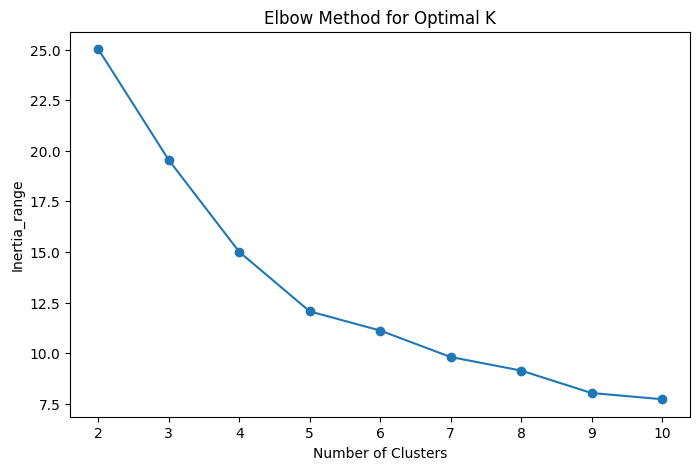

In [33]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), clustered_values, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia_range')
plt.show()

In [52]:
clusters = 5
k_means = KMeans(n_clusters=clusters, random_state=42)
cluster_labels = k_means.fit_predict(scaled_data_frame)

In [53]:
customers_csv['Cluster'] = cluster_labels

In [54]:
db_index_metrices = davies_bouldin_score(scaled_data_frame, cluster_labels)
silhouette_avg_metrices = silhouette_score(scaled_data_frame, cluster_labels)

In [55]:
print("Number of Clusters: ",clusters)
print("Davies-Bouldin Index:", db_index_metrices)
print("Silhouette Score: ",silhouette_avg_metrices)


Number of Clusters:  5
Davies-Bouldin Index: 1.0162332610483622
Silhouette Score:  0.32623251190435254


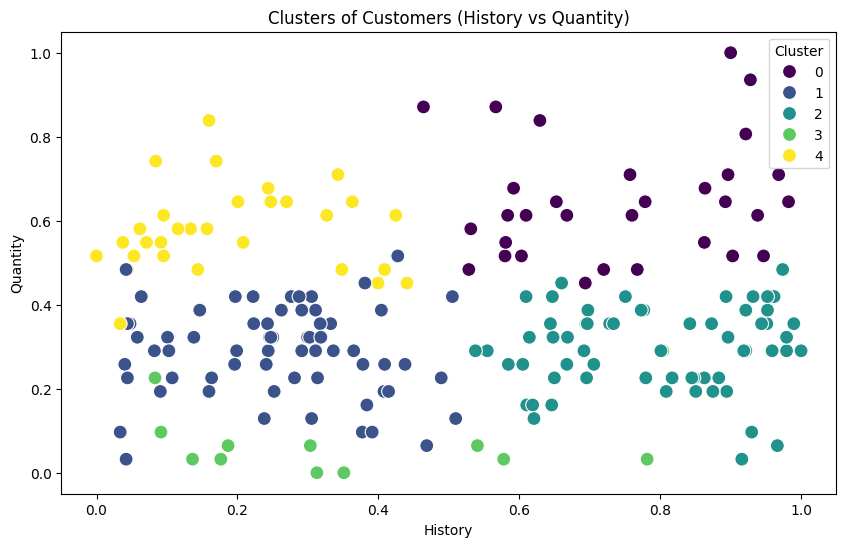

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=customers_csv['history'],
    y=customers_csv['Quantity'],
    hue=customers_csv['Cluster'],
    palette='viridis',
    s=100
)
plt.title('Clusters of Customers (History vs Quantity)')
plt.xlabel('History')
plt.ylabel('Quantity')
plt.legend(title='Cluster')
plt.show()